# SVD 개요
- 분산을 활용하는 PCA와 다르게 특이값을 활용한 잠재의미를 사용
- 추천, 토픽제시
- 목적이 다르다

In [2]:
import numpy as np

np.random.seed(121)
a = np.random.randn(4,4)
a

array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.01411931,  0.6296418 ,  1.70964074, -1.32698736],
       [ 0.40187312, -0.19142667,  1.40382596, -1.96876855]])

In [5]:
# SVD 행렬 분해
U, Sigma, VT = np.linalg.svd(a)

print("U:\n{}".format(U))
print()
print("Sigma:\n{}".format(Sigma))
print()
print("VT:\n{}".format(VT))

U:
[[-0.07913928 -0.31822729  0.86653217  0.37628494]
 [ 0.38294523  0.78655287  0.12002097  0.46934262]
 [ 0.65640669  0.02243181  0.35668848 -0.66437971]
 [ 0.64515128 -0.52873697 -0.32785711  0.44353889]]

Sigma:
[3.4229581  2.02287339 0.46263157 0.07935069]

VT:
[[ 0.04100747  0.22367823  0.78643002 -0.57429458]
 [-0.20019867  0.56209596  0.37041464  0.71187191]
 [-0.77847455  0.3945136  -0.33259252 -0.3573774 ]
 [-0.5934781  -0.69164673  0.36565426  0.18895901]]


In [6]:
# 특이값 Sigma를 대각행렬로 변환
Sigma_mat = np.diag(Sigma)
Sigma_mat

array([[3.4229581 , 0.        , 0.        , 0.        ],
       [0.        , 2.02287339, 0.        , 0.        ],
       [0.        , 0.        , 0.46263157, 0.        ],
       [0.        , 0.        , 0.        , 0.07935069]])

In [7]:
print("원본 행렬 a:\n{}".format(a))

원본 행렬 a:
[[-0.21203317 -0.28492917 -0.57389821 -0.44031017]
 [-0.33011056  1.18369457  1.61537293  0.36706247]
 [-0.01411931  0.6296418   1.70964074 -1.32698736]
 [ 0.40187312 -0.19142667  1.40382596 -1.96876855]]


In [8]:
# U, Sigma, VT를 이용해 다시 조합합
a_ = U @ Sigma_mat @ VT
print("조합된 행렬 a_ : \n{}".format(a_)) 

조합된 행렬 a_ : 
[[-0.21203317 -0.28492917 -0.57389821 -0.44031017]
 [-0.33011056  1.18369457  1.61537293  0.36706247]
 [-0.01411931  0.6296418   1.70964074 -1.32698736]
 [ 0.40187312 -0.19142667  1.40382596 -1.96876855]]


In [9]:
# truncated Sigma_mat . 설명력이 높은 특잇값이 상위 2개면 될 것 같으니까 2개를 사용
Sigma_truncated=np.diag(Sigma[:2])
Sigma_truncated
# Sigma_mat[:2,:2]

array([[3.4229581 , 0.        ],
       [0.        , 2.02287339]])

In [10]:
# truncated U : 잠재변수에(Sigma - 특잇값 2개) 대응되는 기저벡터 얻어내기
U_truncated = U[:,:2]
U_truncated

array([[-0.07913928, -0.31822729],
       [ 0.38294523,  0.78655287],
       [ 0.65640669,  0.02243181],
       [ 0.64515128, -0.52873697]])

In [11]:
# truncated VT : 원래 데이터를 복구하기위해서 2개의 벡터만 사용한다.
VT_truncated = VT[:2]
VT_truncated

array([[ 0.04100747,  0.22367823,  0.78643002, -0.57429458],
       [-0.20019867,  0.56209596,  0.37041464,  0.71187191]])

In [12]:
# 2개의 잠재변수만을 이용해서 복구
a_truncated = U_truncated @ Sigma_truncated @ VT_truncated
print(a_truncated)

[[ 0.11776606 -0.4224323  -0.45148469 -0.3026849 ]
 [-0.26478267  1.18754777  1.62022235  0.37986869]
 [ 0.08305338  0.52807808  1.78380053 -1.25805288]
 [ 0.30468393 -0.10724542  1.34051007 -2.02962493]]


In [13]:
print("원본 행렬 a:\n{}".format(a))

원본 행렬 a:
[[-0.21203317 -0.28492917 -0.57389821 -0.44031017]
 [-0.33011056  1.18369457  1.61537293  0.36706247]
 [-0.01411931  0.6296418   1.70964074 -1.32698736]
 [ 0.40187312 -0.19142667  1.40382596 -1.96876855]]


In [15]:
# 데이터가 선형종속인 경우에는...? 풀랭크x
a[2] = a[0] +a[1]
a[3] = a[0]

a

array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.54214372,  0.8987654 ,  1.04147472, -0.0732477 ],
       [-0.21203317, -0.28492917, -0.57389821, -0.44031017]])

In [16]:
U, Sigma, VT = np.linalg.svd(a)
np.round(Sigma, 3)

array([2.663, 0.807, 0.   , 0.   ])

## 사이파이를 이용한 특이분해

In [17]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd # 넘파이의 svd와 똑같은 기능을 한다.

np.random.seed(121)

In [22]:
matrix = np.random.random((6,6))
print("원본 행렬 : \n{}".format(matrix))

원본 행렬 : 
[[0.38009078 0.42034243 0.78146479 0.85605231 0.71129867 0.05546416]
 [0.59424128 0.65574127 0.07337714 0.0726814  0.01782185 0.2450048 ]
 [0.49606654 0.38797335 0.06239287 0.86778144 0.41956915 0.46921129]
 [0.99127066 0.99148226 0.57524949 0.86479232 0.5117139  0.93808407]
 [0.59989078 0.22406897 0.81864996 0.95870449 0.82300383 0.85239113]
 [0.27247163 0.26418954 0.79853114 0.01973495 0.74504788 0.72271199]]


In [19]:
# full_matrices = False -> Compact SVD 수행
U, Sigma, VT = svd(matrix, full_matrices=False)
print(U.shape, Sigma.shape,)

(6, 6) (6,) (6, 6)


In [20]:
np.round(Sigma,3)

array([3.254, 0.881, 0.839, 0.555, 0.358, 0.035])

In [24]:
# svds : truncated svd를 손쉽게 수행
num_components = 4

U_truncated , Sigma_truncated, VT_truncated = svds(matrix, k=num_components)
U_truncated.shape , Sigma_truncated.shape, VT_truncated.shape

((6, 4), (4,), (4, 6))

# 사이킷런에서 Truncated SVD

In [28]:
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

iris= load_iris()

In [26]:
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris.data)

iris_tsvd = tsvd.transform(iris.data)
iris_tsvd.shape

(150, 2)

In [31]:
import pandas as pd

iris_tsvd_df = pd.DataFrame(
    data=iris_tsvd,
    columns=["components_1", "components_2"]
)

iris_tsvd_df["target"] = iris.target
iris_tsvd_df.head()

,components_1,components_2,target
0,5.912747,2.302033,0
1,5.572482,1.971826,0
2,5.446977,2.095206,0
3,5.436459,1.870382,0
4,5.875645,2.328290,0


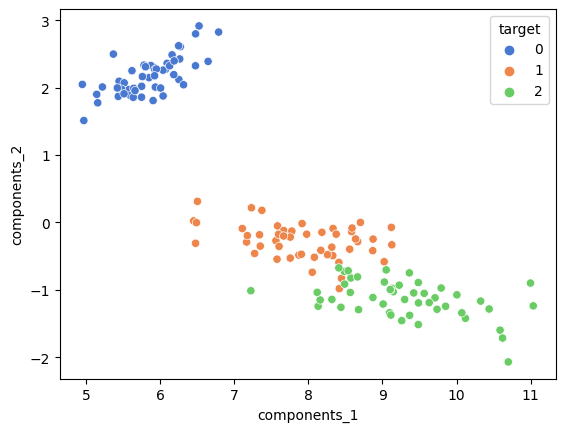

In [32]:
sns.scatterplot(
    x="components_1",
    y="components_2",
    hue="target",
    palette="muted",
    data=iris_tsvd_df
)

plt.show()

In [ ]:
# 스케일링기법을 최대한 안하는게 좋다. Standard 보다는 Min_max 스케일링사용하기

Text(0.5, 1.0, 'PCA Transformed')

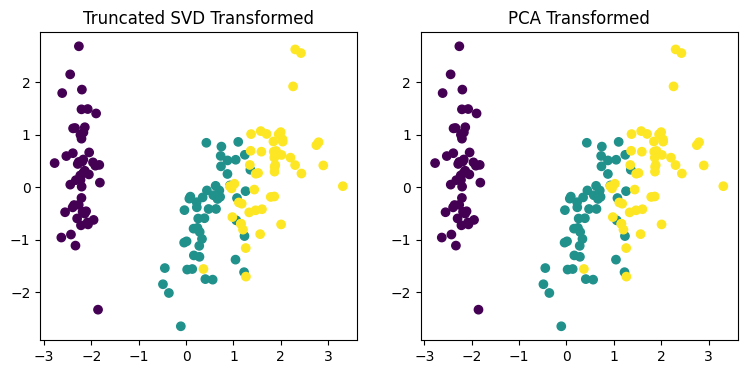

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.data)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현 
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [34]:
# 특잇값 : 원본을 최대한 반영하는 값